In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### let's plot the decision boundary of a SVC for an easy case

<AxesSubplot:>

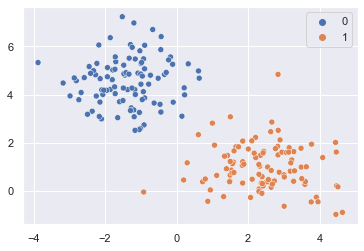

In [2]:
from sklearn.datasets import make_biclusters, make_blobs, make_classification

X, y = make_blobs(n_samples=(100, 100), random_state=42, center_box=(-5, 5))
fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)

In [4]:
from sklearn.svm import SVC

svc = SVC(C=1e5, kernel='linear').fit(X, y)

In [38]:
# copied directly from Jake's PDSH
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # TODO: understand how the decision_function works and generates the below 
    # shown decison boundary.
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=200, linewidth=1, facecolors='none', edgecolors='k');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

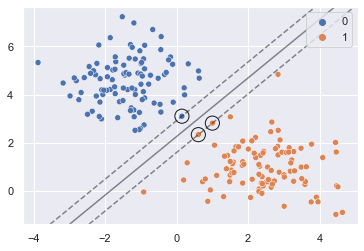

In [39]:
fig, ax = plt.subplots()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax)
plot_svc_decision_function(svc, ax=ax)

### let's run SVC on a slightly more difficult clasification problem

In [41]:
from sklearn.datasets import make_moons

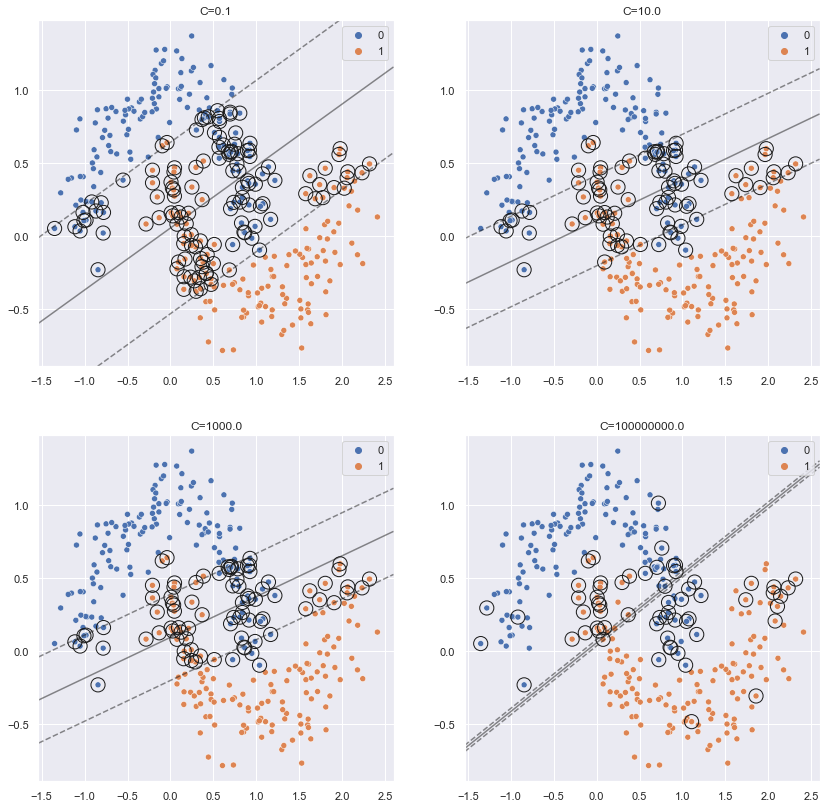

In [48]:
X, y = make_moons(n_samples=300, noise=0.15, random_state=42)
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax = ax.ravel()
Cs = [1e-1, 1e1, 1e3, 1e8]
for i, c in enumerate(Cs):
    svc2 = SVC(kernel='linear', C=c).fit(X, y)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax[i])
    ax[i].set_title('C={}'.format(c))
    plot_svc_decision_function(svc2, ax=ax[i])

In [52]:
from sklearn.ensemble import forest

C:\Users\jvenepal\Anaconda3\envs\cs109a\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
